In [ ]:
!pip install SentencePiece

     |████████████████████████████████| 1.2 MB 5.0 MB/s 


In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:

from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen, Request
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
finvizurl = 'https://finviz.com/quote.ashx?t='

 
tickers = ['GME', 'AMC', 'TSLA']


news_tables = {}

for ticker in tickers:
  url = finvizurl + ticker
  req = Request(url=url, headers={'user-agent': 'my-app'})
  response = urlopen(req)

  html = BeautifulSoup(response, 'html')
  news_table = html.find(id='news-table')
  news_tables[ticker] = news_table

In [4]:
parsed_data = []
#iterating over key and value pairs for every single keyvalue in news table dictionary
for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text #same as get_text()
    date_info = row.td.text.split(' ')
    if len(date_info) == 1:
      time = date_info[0]
    else:
      date = date_info[0]
      time = date_info[1]
    parsed_data.append([ticker, date, time, title])

print(parsed_data)

[['GME', 'Jul-29-21', '01:04PM\xa0\xa0', 'Top Stocks for August 2021'], ['GME', 'Jul-29-21', '10:21AM\xa0\xa0', "Retail investors replaced hedge funds as 'the 800-pound gorilla in the room,' former NYSE trader says"], ['GME', 'Jul-28-21', '01:11PM\xa0\xa0', 'Citadel would buy Robinhood if regulators crack down on this one money-maker: Interactive Brokers founder'], ['GME', 'Jul-28-21', '01:04PM\xa0\xa0', 'Why Shares of Lakeland Financial Are Trading Higher Today'], ['GME', 'Jul-28-21', '01:00PM\xa0\xa0', 'GameStop Does Some Rebranding, Gains Twitter Nod'], ['GME', 'Jul-28-21', '11:12AM\xa0\xa0', 'Twitter to Let Retailers Add Products to Their Profiles in\xa0Shopping Push'], ['GME', 'Jul-28-21', '10:51AM\xa0\xa0', 'Why BlackBerry Is Soaring While AMC and GameStop Fall'], ['GME', 'Jul-28-21', '10:21AM\xa0\xa0', "Robinhood's meme stock status fuels IPO uncertainty"], ['GME', 'Jul-28-21', '06:55AM\xa0\xa0', 'GameStop to change name of EB Games locations in Canada to GameStop'], ['GME', 'Ju

In [5]:
text = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [6]:
text.head()

,ticker,date,time,title
0,GME,Jul-29-21,01:04PM,Top Stocks for August 2021
1,GME,Jul-29-21,10:21AM,Retail investors replaced hedge funds as 'the ...
2,GME,Jul-28-21,01:11PM,Citadel would buy Robinhood if regulators crac...
3,GME,Jul-28-21,01:04PM,Why Shares of Lakeland Financial Are Trading H...
4,GME,Jul-28-21,01:00PM,"GameStop Does Some Rebranding, Gains Twitter Nod"


In [7]:
mean_text = text.groupby(['date'])

In [8]:
mean_text.head()

,ticker,date,time,title
0,GME,Jul-29-21,01:04PM,Top Stocks for August 2021
1,GME,Jul-29-21,10:21AM,Retail investors replaced hedge funds as 'the ...
2,GME,Jul-28-21,01:11PM,Citadel would buy Robinhood if regulators crac...
3,GME,Jul-28-21,01:04PM,Why Shares of Lakeland Financial Are Trading H...
4,GME,Jul-28-21,01:00PM,"GameStop Does Some Rebranding, Gains Twitter Nod"
...,...,...,...,...
137,AMC,Jul-21-21,12:33PM,Why AMC and Other Meme Stocks Moved Today
160,AMC,Jul-17-21,10:22AM,Beyond GameStop: Reddits WallStreetBets is Now...
161,AMC,Jul-17-21,08:35AM,Is There Any Hope Left for AMC Entertainment S...
198,AMC,Jul-13-21,03:19PM,Dow Jones Dips As Fed Official Makes This Clai...


In [9]:
test = text.groupby(['date','ticker'])['title'].apply(' '.join).reset_index()

In [10]:
test.head(20)

,date,ticker,title
0,Jul-12-21,GME,10 Reddits WallStreetBets Meme Stocks Hedge Fu...
1,Jul-13-21,AMC,Dow Jones Dips As Fed Official Makes This Clai...
2,Jul-13-21,GME,"How Much $10,000 Invested This Year In AMC Sto..."
3,Jul-14-21,AMC,"These meme stocks are, 'generating some bad ha..."
4,Jul-14-21,GME,Meet the teen investors of the future These me...
5,Jul-15-21,AMC,"AMC, GameStop Swing as Meme Stocks Run Out of ..."
6,Jul-15-21,GME,GameStop (GME) Dips More Than Broader Markets:...
7,Jul-16-21,AMC,"Why AMC, GameStop, and Newegg Were All Over th..."
8,Jul-16-21,GME,"Why AMC, GameStop, and Newegg Were All Over th..."
9,Jul-17-21,AMC,Beyond GameStop: Reddits WallStreetBets is Now...


In [11]:
test.iloc[0,2]

'10 Reddits WallStreetBets Meme Stocks Hedge Funds are Piling Into GameStop Stuck at Current Level as Investors Hunt Bottom'

In [12]:
test['date'] = pd.to_datetime(test.date).dt.date

In [13]:
print(test)

          date ticker                                              title
0   2021-07-12    GME  10 Reddits WallStreetBets Meme Stocks Hedge Fu...
1   2021-07-13    AMC  Dow Jones Dips As Fed Official Makes This Clai...
2   2021-07-13    GME  How Much $10,000 Invested This Year In AMC Sto...
3   2021-07-14    AMC  These meme stocks are, 'generating some bad ha...
4   2021-07-14    GME  Meet the teen investors of the future These me...
5   2021-07-15    AMC  AMC, GameStop Swing as Meme Stocks Run Out of ...
6   2021-07-15    GME  GameStop (GME) Dips More Than Broader Markets:...
7   2021-07-16    AMC  Why AMC, GameStop, and Newegg Were All Over th...
8   2021-07-16    GME  Why AMC, GameStop, and Newegg Were All Over th...
9   2021-07-17    AMC  Beyond GameStop: Reddits WallStreetBets is Now...
10  2021-07-17    GME  Beyond GameStop: Reddits WallStreetBets is Now...
11  2021-07-18    GME  How Much More Does GameStop Have to Fall Befor...
12  2021-07-19    AMC  Rosen Law Announces Updated 

In [14]:
mean_text['date'].unique()

date
Jul-12-21    [Jul-12-21]
Jul-13-21    [Jul-13-21]
Jul-14-21    [Jul-14-21]
Jul-15-21    [Jul-15-21]
Jul-16-21    [Jul-16-21]
Jul-17-21    [Jul-17-21]
Jul-18-21    [Jul-18-21]
Jul-19-21    [Jul-19-21]
Jul-20-21    [Jul-20-21]
Jul-21-21    [Jul-21-21]
Jul-22-21    [Jul-22-21]
Jul-23-21    [Jul-23-21]
Jul-24-21    [Jul-24-21]
Jul-25-21    [Jul-25-21]
Jul-26-21    [Jul-26-21]
Jul-27-21    [Jul-27-21]
Jul-28-21    [Jul-28-21]
Jul-29-21    [Jul-29-21]
Name: date, dtype: object

In [15]:
test.head()

,date,ticker,title
0,2021-07-12,GME,10 Reddits WallStreetBets Meme Stocks Hedge Fu...
1,2021-07-13,AMC,Dow Jones Dips As Fed Official Makes This Clai...
2,2021-07-13,GME,"How Much $10,000 Invested This Year In AMC Sto..."
3,2021-07-14,AMC,"These meme stocks are, 'generating some bad ha..."
4,2021-07-14,GME,Meet the teen investors of the future These me...


In [16]:
vader = SentimentIntensityAnalyzer()

In [21]:
func = lambda title: vader.polarity_scores(title)['compound']
test['compound'] = test['title'].apply(func)
#test['date'] = pd.to_datetime(text.date).dt.date

test.head(21)

,date,ticker,title,compound
0,2021-07-12,GME,10 Reddits WallStreetBets Meme Stocks Hedge Fu...,-0.2500
1,2021-07-13,AMC,Dow Jones Dips As Fed Official Makes This Clai...,-0.9420
2,2021-07-13,GME,"How Much $10,000 Invested This Year In AMC Sto...",0.7034
3,2021-07-14,AMC,"These meme stocks are, 'generating some bad ha...",0.6800
4,2021-07-14,GME,Meet the teen investors of the future These me...,-0.1280
5,2021-07-15,AMC,"AMC, GameStop Swing as Meme Stocks Run Out of ...",0.8875
6,2021-07-15,GME,GameStop (GME) Dips More Than Broader Markets:...,0.5873
7,2021-07-16,AMC,"Why AMC, GameStop, and Newegg Were All Over th...",0.3293
8,2021-07-16,GME,"Why AMC, GameStop, and Newegg Were All Over th...",0.6145
9,2021-07-17,AMC,Beyond GameStop: Reddits WallStreetBets is Now...,0.6908


In [19]:
test['date'].unique

<bound method Series.unique of 0     2021-07-12
1     2021-07-13
2     2021-07-13
3     2021-07-14
4     2021-07-14
5     2021-07-15
6     2021-07-15
7     2021-07-16
8     2021-07-16
9     2021-07-17
10    2021-07-17
11    2021-07-18
12    2021-07-19
13    2021-07-19
14    2021-07-20
15    2021-07-20
16    2021-07-21
17    2021-07-21
18    2021-07-22
19    2021-07-22
20    2021-07-23
21    2021-07-23
22    2021-07-24
23    2021-07-25
24    2021-07-25
25    2021-07-26
26    2021-07-26
27    2021-07-26
28    2021-07-27
29    2021-07-27
30    2021-07-27
31    2021-07-28
32    2021-07-28
33    2021-07-28
34    2021-07-29
35    2021-07-29
36    2021-07-29
Name: date, dtype: object>

In [20]:
vader.polarity_scores(test['title'].loc[0])

{'compound': -0.25, 'neg': 0.1, 'neu': 0.9, 'pos': 0.0}

In [22]:
test2 = test

In [23]:
test2.head()

,date,ticker,title,compound
0,2021-07-12,GME,10 Reddits WallStreetBets Meme Stocks Hedge Fu...,-0.2500
1,2021-07-13,AMC,Dow Jones Dips As Fed Official Makes This Clai...,-0.9420
2,2021-07-13,GME,"How Much $10,000 Invested This Year In AMC Sto...",0.7034
3,2021-07-14,AMC,"These meme stocks are, 'generating some bad ha...",0.6800
4,2021-07-14,GME,Meet the teen investors of the future These me...,-0.1280


In [24]:
mean_text = test2.groupby(['ticker', 'date']).mean()
print(mean_text)

                   compound
ticker date                
AMC    2021-07-13   -0.9420
       2021-07-14    0.6800
       2021-07-15    0.8875
       2021-07-16    0.3293
       2021-07-17    0.6908
       2021-07-19    0.6908
       2021-07-20    0.9534
       2021-07-21    0.7783
       2021-07-22   -0.5994
       2021-07-23    0.0085
       2021-07-25   -0.3818
       2021-07-26    0.1531
       2021-07-27    0.8374
       2021-07-28    0.0000
       2021-07-29    0.0000
GME    2021-07-12   -0.2500
       2021-07-13    0.7034
       2021-07-14   -0.1280
       2021-07-15    0.5873
       2021-07-16    0.6145
       2021-07-17    0.0000
       2021-07-18    0.0000
       2021-07-19   -0.4019
       2021-07-20    0.8458
       2021-07-21   -0.0772
       2021-07-22    0.2732
       2021-07-23    0.7125
       2021-07-24    0.0000
       2021-07-25   -0.3818
       2021-07-26    0.2023
       2021-07-27    0.8374
       2021-07-28    0.2960
       2021-07-29    0.2023
TSLA   2021-07-26   

In [25]:
mean_text = mean_text.unstack()
mean_text = mean_text.xs('compound', axis="columns").transpose()

<Figure size 720x576 with 0 Axes>

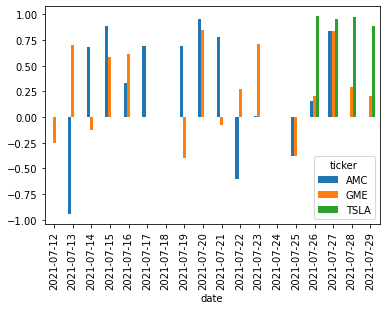

In [26]:
plt.figure(figsize=(10,8))
mean_text.plot(kind='bar')
plt.show()

In [27]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=a0b7b15202ac3efe14f0233149972182852a39ca0b70408eafd7d4598c2a8fc1
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [28]:
import yfinance as yf

In [29]:
start_date = '2021-07-13'
end_date = '2021-07-27'



data = pd.DataFrame()

# Fetch the data
for ticker in tickers:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
    
# Print first 5 rows of the data
data.head(17)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GME,AMC,TSLA
Date,,,
2021-07-13,180.059998,39.349998,668.539978
2021-07-14,167.619995,33.430000,653.380005
2021-07-15,166.820007,36.000000,650.599976
2021-07-16,169.039993,34.959999,644.219971
2021-07-19,173.490005,34.619999,646.219971
2021-07-20,191.179993,43.090000,660.500000
2021-07-21,185.809998,40.779999,655.289978
2021-07-22,178.850006,37.240002,649.260010
2021-07-23,180.360001,36.990002,643.380005


In [30]:
gme = yf.Ticker('GME').history(start="2021-07-13",  end="2021-07-27")
 

In [31]:
gme.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-13,187.679993,188.789993,179.000000,180.059998,2397900,0,0
2021-07-14,180.490005,182.380005,165.070007,167.619995,3913800,0,0
2021-07-15,160.000000,171.990005,158.009995,166.820007,4298600,0,0
2021-07-16,170.149994,179.470001,166.300003,169.039993,3278800,0,0
2021-07-19,163.300003,176.000000,161.220001,173.490005,2436900,0,0


In [32]:
gme = gme.drop(['Dividends','Stock Splits'],axis=1)

In [33]:
gme = gme.reset_index()

In [34]:
gme.columns = gme.columns.str.lower()

In [35]:
gme.head()

,date,open,high,low,close,volume
0,2021-07-13,187.679993,188.789993,179.000000,180.059998,2397900
1,2021-07-14,180.490005,182.380005,165.070007,167.619995,3913800
2,2021-07-15,160.000000,171.990005,158.009995,166.820007,4298600
3,2021-07-16,170.149994,179.470001,166.300003,169.039993,3278800
4,2021-07-19,163.300003,176.000000,161.220001,173.490005,2436900


In [36]:
gme_sent = test[test['ticker'] == 'GME']

In [37]:
gme_sent.head()

,date,ticker,title,compound
0,2021-07-12,GME,10 Reddits WallStreetBets Meme Stocks Hedge Fu...,-0.2500
2,2021-07-13,GME,"How Much $10,000 Invested This Year In AMC Sto...",0.7034
4,2021-07-14,GME,Meet the teen investors of the future These me...,-0.1280
6,2021-07-15,GME,GameStop (GME) Dips More Than Broader Markets:...,0.5873
8,2021-07-16,GME,"Why AMC, GameStop, and Newegg Were All Over th...",0.6145


In [38]:
gme_sent['date'] = gme_sent['date'].astype('datetime64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
gme_merge = gme_sent.merge(gme,on='date')

In [40]:
gme.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [41]:
gme_sent.dtypes

date        datetime64[ns]
ticker              object
title               object
compound           float64
dtype: object

In [42]:
gme_merge.head()

,date,ticker,title,compound,open,high,low,close,volume
0,2021-07-13,GME,"How Much $10,000 Invested This Year In AMC Sto...",0.7034,187.679993,188.789993,179.000000,180.059998,2397900
1,2021-07-14,GME,Meet the teen investors of the future These me...,-0.1280,180.490005,182.380005,165.070007,167.619995,3913800
2,2021-07-15,GME,GameStop (GME) Dips More Than Broader Markets:...,0.5873,160.000000,171.990005,158.009995,166.820007,4298600
3,2021-07-16,GME,"Why AMC, GameStop, and Newegg Were All Over th...",0.6145,170.149994,179.470001,166.300003,169.039993,3278800
4,2021-07-19,GME,Rosen Law Announces Updated Lead Plaintiff Dea...,-0.4019,163.300003,176.000000,161.220001,173.490005,2436900


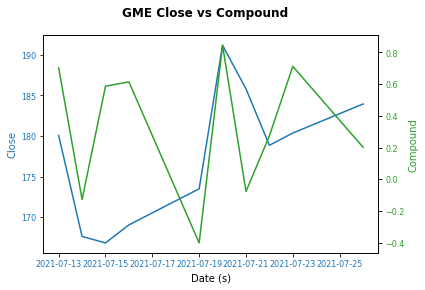

In [43]:

fig, ax1 = plt.subplots()
   
color = 'tab:blue'
ax1.set_xlabel('Date (s)')
ax1.set_ylabel('Close', color = color)
ax1.plot(gme_merge['date'], gme_merge['close'], color = color)
#ax1.tick_params(axis ='y', labelcolor = color)
ax1.tick_params(axis ='both', which='major', labelsize='8',labelcolor = color)

   
ax2 = ax1.twinx()
   
color = 'tab:green'
ax2.set_ylabel('Compound', color = color)
ax2.plot(gme_merge['date'], gme_merge['compound'], color = color)
#ax2.tick_params(axis ='y', labelcolor = color)
ax2.tick_params(axis ='both', which='major', labelsize='8',labelcolor = color)
  
fig.suptitle('GME Close vs Compound', fontweight ="bold")

plt.show()

In [44]:
amc = yf.Ticker('AMC').history(start="2021-07-13",  end="2021-07-27")
amc = amc.drop(['Dividends','Stock Splits'],axis=1)
amc = amc.reset_index()
amc.columns = amc.columns.str.lower()
amc_sent = test[test['ticker'] == 'AMC']
amc_sent['date'] = amc_sent['date'].astype('datetime64')
amc_merge = amc_sent.merge(gme,on='date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


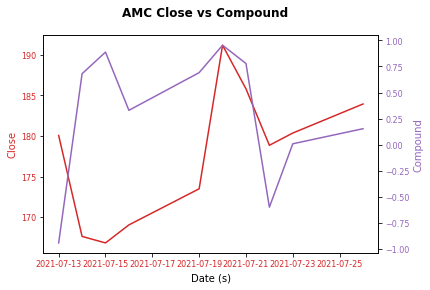

In [45]:
fig, ax1 = plt.subplots()
   
color = 'tab:red'
ax1.set_xlabel('Date (s)')
ax1.set_ylabel('Close', color = color)
ax1.plot(amc_merge['date'], amc_merge['close'], color = color)
#ax1.tick_params(axis ='y', labelcolor = color)
ax1.tick_params(axis ='both', which='major', labelsize='8',labelcolor = color)

   
ax2 = ax1.twinx()
   
color = 'tab:purple'
ax2.set_ylabel('Compound', color = color)
ax2.plot(amc_merge['date'], amc_merge['compound'], color = color)
#ax2.tick_params(axis ='y', labelcolor = color)
ax2.tick_params(axis ='both', which='major', labelsize='8',labelcolor = color)
  
fig.suptitle('AMC Close vs Compound', fontweight ="bold")

plt.show()